In [1]:
""" Setup the environment for the notebook """
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

""" Importlib is used to reload the module after changes.
    This is useful when developing the module and testing it in the notebook.
    The reload is done by running the cell again.

    REMEMBER TO ADD THE MODULE BELOW FOR RELOADING.
"""



/Users/seanjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


' Importlib is used to reload the module after changes.\n    This is useful when developing the module and testing it in the notebook.\n    The reload is done by running the cell again.\n\n    REMEMBER TO ADD THE MODULE BELOW FOR RELOADING.\n'

In [2]:
""" Data Requirements:
Data Source:    Yahoo Finance
Data Type:      Historical Daily Stock Prices
Data Period:    01/01/2018 - 12/31/2022
Data Columns:   Date, Open, High, Low, Close, Volume (Can be more).
Description:    Need to have 20 different stocks to analyze and
    compute monthly returns.
"""

DATA_PERIOD = {
    'start': datetime.datetime(2018, 1, 1),
    'end': datetime.datetime(2022, 12, 31),
    'period': '1d',
}

STOCK_TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NOD.OL', 'NVDA', 'TSLA', 'UAA', 'SNAP', 'TEL.OL', 'MPCC.OL', 'AKAST.OL', 'BA', 'ADBE', 'ORCL', 'NTDOY', 'PCG', 'KHC', 'SONY']
print(f"Number of stocks: {len(STOCK_TICKERS)}")

Number of stocks: 20


In [8]:
"""TODO: Download data & Dont fetch if downloaded"""

def load_or_download_stock_data(ticker, **kwargs):
    import os
    path = os.path.join(os.getcwd(), "data/raw", f"{ticker}.csv")
    data = pd.DataFrame()
    if os.path.exists(path):
        data = pd.read_csv(path, parse_dates=True, index_col='Date')
    else:
        data = download_stock_data(ticker, **kwargs)
        data.reset_index(inplace=True)
        data['Date'] = data['Date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=x.day))
        data.set_index('Date', inplace=True)
        data.to_csv(path)
    return data['Close']

def download_stock_data(ticker, **kwargs):
    import yfinance as yf
    stock = yf.Ticker(ticker)
    data = stock.history(**kwargs)
    return data

stock_data = pd.DataFrame({ticker: load_or_download_stock_data(ticker, **DATA_PERIOD) for ticker in STOCK_TICKERS})
monthly_returns = stock_data.resample('ME').last().pct_change().dropna()

<bound method DataFrame.value_counts of                   AAPL        MSFT      GOOGL       AMZN        META  \
Date                                                                   
2018-01-02   40.568935   79.792900  53.527958  59.450500  180.875397   
2018-01-03   40.561859   80.164268  54.441196  60.209999  184.115646   
2018-01-04   40.750271   80.869835  54.652668  60.479500  183.776672   
2018-01-05   41.214230   81.872452  55.377377  61.457001  186.289108   
2018-01-08   41.061146   81.955986  55.572891  62.343498  187.714813   
...                ...         ...        ...        ...         ...   
2022-12-23  130.631363  235.345551  89.009598  85.250000  117.685661   
2022-12-27  128.818420  233.600662  87.174141  83.040001  116.529144   
2022-12-28  124.865585  231.205109  85.807526  81.820000  115.272926   
2022-12-29  128.402328  237.593246  88.231522  84.180000  119.899002   
2022-12-30  128.719330  236.420120  88.012070  84.000000  119.978752   

                NOD.OL 

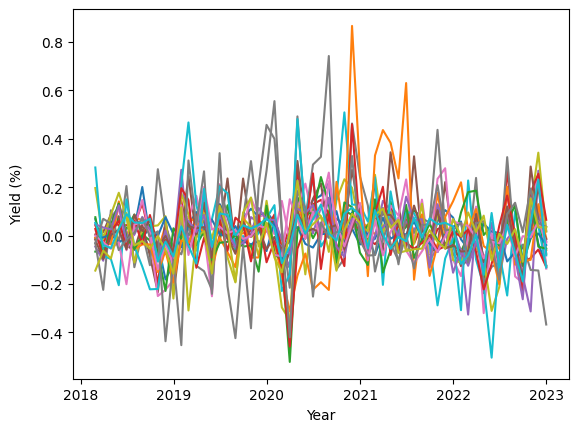

In [4]:
plt.plot(monthly_returns)
plt.xlabel("Year")
plt.ylabel("Yield (%)")
plt.show()

Offspring Size700
[0](2.610182394240624
[last](0.0016834339460120645))
Offspring Size700
[0](10.762644001840853
[last](-0.014691442476761752))
Offspring Size700
[0](20.54817108284717
[last](-0.026921778258972556))
Offspring Size700
[0](25.39483059692308
[last](0.011398707282538337))
Offspring Size700
[0](230.52054911083096
[last](-0.1105499407547302))
Offspring Size700
[0](284.53414804925853
[last](-0.032782971967378144))
Offspring Size700
[0](512.8867132457547
[last](-1.3119808449036259))
Offspring Size700
[0](1036.5436683373732
[last](0.011494986786915932))
Offspring Size700
[0](3401.9773649872327
[last](-0.29840232221961815))
Offspring Size700
[0](3401.9773649872327
[last](-15.718912564412717))
Offspring Size700
[0](20840.42674807099
[last](-7.352178878447088))
Offspring Size700
[0](136555.87036514335
[last](-45.0546752842546))
Offspring Size700
[0](136555.87036514335
[last](-12.51991132912318))
Offspring Size700
[0](688892.2908824696
[last](0.011494987324385444))
Offspring Size700


/Users/seanjensen/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/seanjensen/ACIT/first_year/ACIT4610/ACIT4610_Portifolio_KMHS/problem_2/mutations/self_adaptive/one_step_mutator.py:22: RuntimeWarning: overflow encountered in scalar multiply
  sigma_prime = self.sigma * np.exp(np.random.normal(0, self.learning_rate))
/Users/seanjensen/ACIT/first_year/ACIT4610/ACIT4610_Portifolio_KMHS/problem_2/es/individual.py:43: RuntimeWarning: invalid value encountered in scalar divide
  self.chromosone = np.array([(c / sum) if c > 0 else 0 for c in self.chromosone])


[0](3.6588607243359943e+307
[last](nan))
Offspring Size700
[0](3.6588607243359943e+307
[last](nan))
Offspring Size700
[0](3.6588607243359943e+307
[last](nan))
Offspring Size700
[0](3.6588607243359943e+307
[last](nan))
Offspring Size700
[0](3.6588607243359943e+307
[last](0.0))
Offspring Size700
[0](3.6588607243359943e+307
[last](0.0))
Offspring Size700
[0](3.965402220865659e+307
[last](-7.439305573908738e+306))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](-2.0271344325565944e+307))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](3.965402220865659e+307
[last](-2.6479348181134476e+307))
Offspring Size700
[0](3.965402220865659e+307
[last](nan))
Offspring Size700
[0](

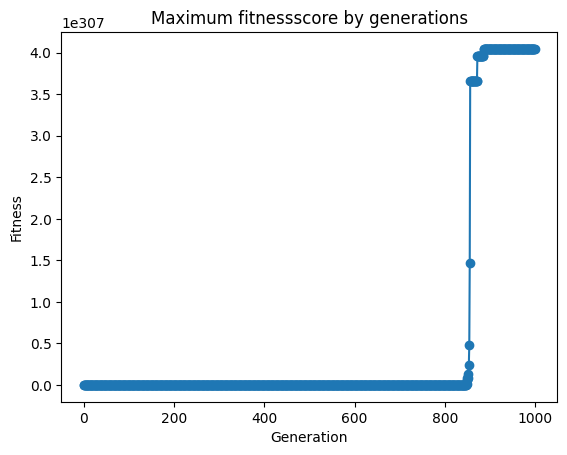

In [5]:
from es.es_factory import ESFactory
from utils.es_logger import ESLogger
logger = ESLogger()

factory = ESFactory(monthly_returns=monthly_returns)
advanced_one = factory.create_basic(steps=1, population_size=100, offspring_size=700).fit(generations=1000, logger=logger)
logger.flush()

Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466766))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.011851364659466769
[last](0.011851364659466769))
Offspring Size1
[0](0.07739566561459629
[last](0.011851364659466769))
Offspring Size1
[0](0.07739566561459629
[last](0.013899859090456726))
Offspring Size1
[0](0.07739566561459629
[last](0.013899859090456726))
Offspring Size1
[0](0.07739566561459629
[last](-0.11694365111544397))
Offspring Size1
[0](0.07739566561459629
[last](0.013899859090456726))
Offspring Size1
[0](0.07739566561459629
[last](0.04657539807272542))
Offspring Siz

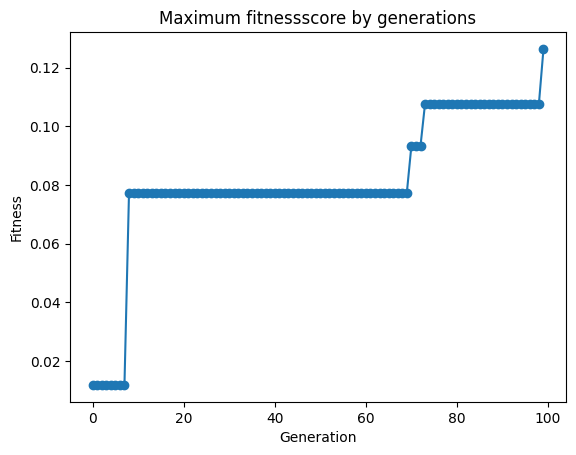

In [6]:
advanced_n = factory.create_basic(steps=len(STOCK_TICKERS), population_size=1, offspring_size=1) \
    .fit(generations=100, logger=logger)
logger.flush()

In [7]:
print(advanced_n[0].chromosone)
print(advanced_n[0].chromosone.sum())

[-0.35831847 -1.03476381  0.04770447  0.07654457  0.29439029  2.36057427
  0.37546681  1.0751467   0.16694454  0.12316869 -0.04574109 -0.09453106
 -0.37256106  0.22045583  1.19331764 -0.21002688  2.31375746  0.62720105
  0.17538114 -0.05034774]
6.883763362551371
